# Regression Infrared using K-NN and Decision Tree
## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error, mean_squared_error, r2_score

## Importing the Infrared dataset and display the first few rows

In [2]:
dataset = pd.read_csv('Infrared.csv')
print(dataset.head())

   Gender    Age                  Ethnicity  ...    T_OR1  T_OR_Max1  aveOralM
0    Male  41-50                      White  ...  35.6350    35.6525     36.59
1  Female  31-40  Black or African-American  ...  35.0925    35.1075     37.19
2  Female  21-30                      White  ...  35.8600    35.8850     37.34
3  Female  21-30  Black or African-American  ...  34.9650    34.9825     37.09
4    Male  18-20                      White  ...  35.5875    35.6175     37.04

[5 rows x 34 columns]


# Check empty data and delete its empty row

In [3]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1020 non-null   object 
 1   Age          1020 non-null   object 
 2   Ethnicity    1020 non-null   object 
 3   T_atm        1020 non-null   float64
 4   Humidity     1020 non-null   float64
 5   Distance     1018 non-null   float64
 6   T_offset1    1020 non-null   float64
 7   Max1R13_1    1020 non-null   float64
 8   Max1L13_1    1020 non-null   float64
 9   aveAllR13_1  1020 non-null   float64
 10  aveAllL13_1  1020 non-null   float64
 11  T_RC1        1020 non-null   float64
 12  T_RC_Dry1    1020 non-null   float64
 13  T_RC_Wet1    1020 non-null   float64
 14  T_RC_Max1    1020 non-null   float64
 15  T_LC1        1020 non-null   float64
 16  T_LC_Dry1    1020 non-null   float64
 17  T_LC_Wet1    1020 non-null   float64
 18  T_LC_Max1    1020 non-null   float64
 19  RCC1  

In [4]:
print(dataset.isnull().sum())

Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       2
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
aveOralM       0
dtype: int64


In [5]:
# Hapus baris yang kosong
dataset.dropna(subset = ['Distance'], inplace=True)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1018 entries, 0 to 1019
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1018 non-null   object 
 1   Age          1018 non-null   object 
 2   Ethnicity    1018 non-null   object 
 3   T_atm        1018 non-null   float64
 4   Humidity     1018 non-null   float64
 5   Distance     1018 non-null   float64
 6   T_offset1    1018 non-null   float64
 7   Max1R13_1    1018 non-null   float64
 8   Max1L13_1    1018 non-null   float64
 9   aveAllR13_1  1018 non-null   float64
 10  aveAllL13_1  1018 non-null   float64
 11  T_RC1        1018 non-null   float64
 12  T_RC_Dry1    1018 non-null   float64
 13  T_RC_Wet1    1018 non-null   float64
 14  T_RC_Max1    1018 non-null   float64
 15  T_LC1        1018 non-null   float64
 16  T_LC_Dry1    1018 non-null   float64
 17  T_LC_Wet1    1018 non-null   float64
 18  T_LC_Max1    1018 non-null   float64
 19  RCC1       

# Feature Selection

In [6]:
# Hapus kolom yang tidak diperlukan untuk feature dan tentukan aveOralM sebagai target
columns_to_drop = ["Gender", "Age", "Ethnicity", "aveOralM"]
X = dataset.drop(columns=columns_to_drop)  # Features
y = dataset["aveOralM"] # Target

# Pilih kolom yang bertipe numerik saja
# X_numeric = X.select_dtypes(include=['float64', 'int64'])

## Splitting the dataset into the Training set and Test set (70:30)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Training the K-NN Regression and Decision Tree model on the Training set

In [8]:
modelKnn = KNeighborsRegressor().fit(X_train, y_train)
modelDecisionTree = DecisionTreeRegressor().fit(X_train, y_train)

## Predicting the Test set results

In [9]:
y_predKnn = modelKnn.predict(X_test)
y_predDecisionTree = modelDecisionTree.predict(X_test)

## Visualize the actual and predicted value

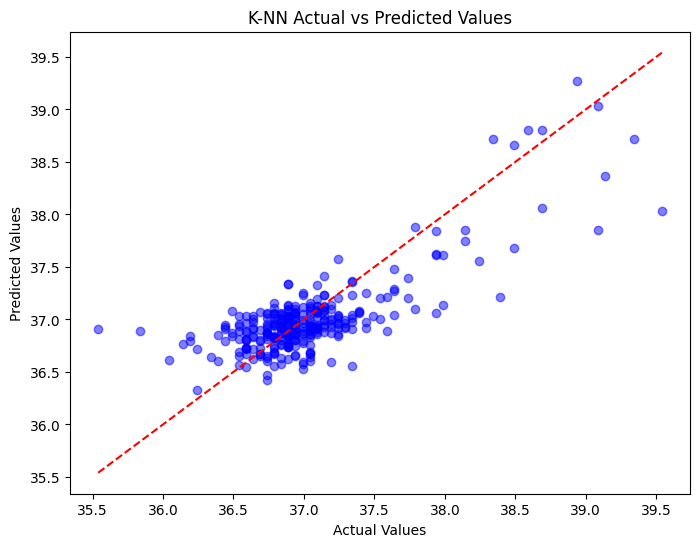

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predKnn, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('K-NN Actual vs Predicted Values')
plt.show()

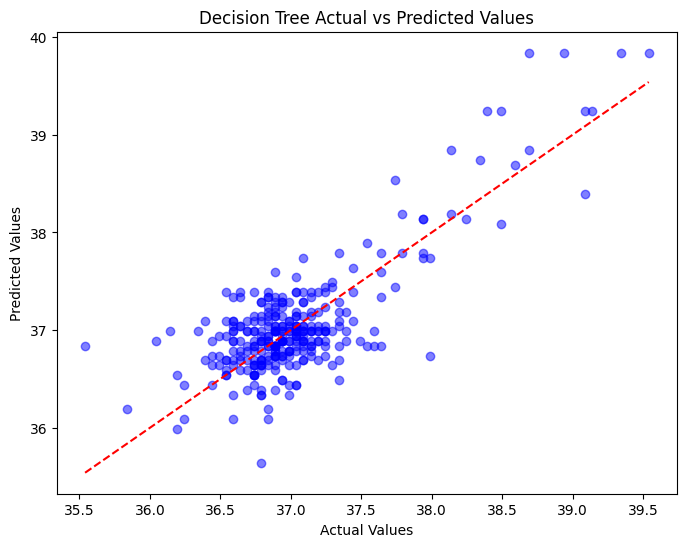

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predDecisionTree, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Actual vs Predicted Values')
plt.show()

## Evaluate the model's performance

In [12]:
rmseKnn = root_mean_squared_error(y_test, y_predKnn)
rmseDecisionTree = root_mean_squared_error(y_test, y_predDecisionTree)

mseKnn = mean_squared_error(y_test, y_predKnn)
mseDecisionTree = mean_squared_error(y_test, y_predDecisionTree)

r2Knn = r2_score(y_test, y_predKnn)
r2DecisionTree = r2_score(y_test, y_predDecisionTree)

# Tampilkan hasil evaluasi
print(f"K-NN RMSE: {rmseKnn}")
print(f"K-NN MSE: {mseKnn}")
print(f"K-NN R-squared: {r2Knn}")

print(f"Decision Tree RMSE: {rmseDecisionTree}")
print(f"Decision Tree MSE: {mseDecisionTree}")
print(f"Decision Tree R-squared: {r2DecisionTree}")

K-NN RMSE: 0.32042455496549693
K-NN MSE: 0.10267189542483676
K-NN R-squared: 0.6235753213155222
Decision Tree RMSE: 0.358019698585376
Decision Tree MSE: 0.12817810457516352
Decision Tree R-squared: 0.5300622275507385


## Mean Squared Error (MSE)
Mean Squared Error (MSE) adalah salah satu metrik yang digunakan untuk mengevaluasi kualitas model regresi. MSE mengukur rata-rata kuadrat selisih antara nilai prediksi dan nilai aktual. Semakin kecil nilai MSE, semakin baik model dalam memprediksi data.

## R-squared (Koefisien Determinasi)
R-squared adalah metrik evaluasi yang mengukur seberapa baik model regresi menjelaskan variabilitas dalam data target. Nilai R-squared berkisar antara 0 dan 1. Jika R-squared = 1, model memprediksi semua data dengan sempurna. Jika R-squared = 0, model tidak dapat menjelaskan variabilitas data.